# Stephen Curry
Purpose: R Hands-on code

Data Preprocessing, Exploratory Data Analysis, Machine Learning

<img src="images/scurry2.jpg" alt="Lebron James" width="300" height="350">

### Peek at Data 
Stephen Curry Stats from: https://www.basketball-reference.com/players/c/curryst01/gamelog/2018/

Modifications: Combined playoff data with regular season data and continued g column for playoff data

- Rank (RK)
- Season Game (G)
- Date when Game was played (Date): YYYY-MM-DD
- Age (Age): Year-Day
- Team (Tm)
- column 5: away or home, if @ is present, then Lebron is Away
- Opponent (Opp)
- column 7: W/L (+/- final score difference)
- Game Started (GS): 1/0 
- Minutes Played (MP)
- Field Goal Made (FG)
- Field Goal Attempts (FGA)
- Field Goal Percentage (FG%)
- 3-pt field goals (3P)
- 3-pt field goal attempts (3PA)
- Free throw (FT)
- Free throw attempts (FTA)
- Free throw percentage (FT%)
- Offence Rebound (ORB)
- Defensive Rebound (DRB)
- Total Rebound (TRB)
- Assists (AST)
- Steals (STL)
- Blocks (BLK)
- TurnOver (TOV)
- Personal Fouls (PF)
- Game Score (GmSc): the formula is $$ PTS + 0.4  FG - 0.7 \times FGA - 0.4 \times (FTA - FT) + 0.7 \times ORB + 0.3 \times DRB + STL + 0.7 \times AST + 0.7 \times BLK - 0.4 \times PF - TOV$$ Game Score was created by John Hollinger to give a rough measure of a player's productivity for a single game. The scale is similar to that of points scored, (40 is an outstanding performance, 10 is an average performance, etc.)
- +/-: reflects how well the team did when Lebron was on the court. Ex: +5 means Cavs outscored team by 5 when Lebron was on court

For more definitions go to https://www.basketball-reference.com/about/glossary.html

In [1]:
library(stringr)
library(ggplot2)
library(GGally)
library(repr)

Warning message:
“package ‘stringr’ was built under R version 3.4.4”Warning message:
“package ‘GGally’ was built under R version 3.4.4”Warning message:
“package ‘repr’ was built under R version 3.4.4”

In [2]:
# R truncates the display of columns 
# This command is the equivalent to pd.options.display.max_columns=30
options(repr.matrix.max.cols=30)

In [3]:
# import data 
df <- read.table('data/scurry.csv', header=TRUE, sep=',')

In [4]:
# sneak a peak at data 
head(df)

Rk,G,Date,Age,Tm,X,Opp,X.1,GS,MP,FG,FGA,FG.,X3P,X3PA,X3P.,FT,FTA,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,X...
1,1,2015-10-27,27-227,GSW,,NOP,W (+16),1,35:37,14,26,.538,5,12,.417,7,7,1.000,3,3,6,7,2,0,2,1,40,34.9,+12
2,2,2015-10-30,27-230,GSW,@,HOU,W (+20),1,27:24,9,15,.600,4,9,.444,3,4,.750,0,7,7,6,1,0,1,4,25,22.4,+12
3,3,2015-10-31,27-231,GSW,@,NOP,W (+14),1,35:38,17,27,.630,8,14,.571,11,11,1.000,0,4,4,9,4,0,2,3,53,49.2,+16
4,4,2015-11-02,27-233,GSW,,MEM,W (+50),1,28:24,10,16,.625,4,8,.500,6,6,1.000,1,2,3,3,3,1,3,2,30,26.1,+37
5,5,2015-11-04,27-235,GSW,,LAC,W (+4),1,32:38,8,17,.471,7,11,.636,8,9,.889,0,5,5,4,1,0,0,3,31,26.0,+7
6,6,2015-11-06,27-237,GSW,,DEN,W (+15),1,34:39,12,22,.545,8,16,.500,2,3,.667,0,7,7,10,3,1,4,1,34,31.4,+14


## Data Preprocessing

In [5]:
# renaming columns
# maybe I'm importing csv incorrectly? 
# tre (TRAY) = 3 
colnames(df)[colnames(df)=='X']<-'HomeAway'
colnames(df)[colnames(df)=='X.1']<-'Result'
colnames(df)[colnames(df)=='FG.']<-'FGPercent'
colnames(df)[colnames(df)=='X3P']<-'TreP'
colnames(df)[colnames(df)=='X3PA']<-'TrePA'
colnames(df)[colnames(df)=='X3P.']<-'TrePercent'
colnames(df)[colnames(df)=='FT.']<-'FTPercent'
colnames(df)[colnames(df)=='X...']<-'PlusMinus'

In [6]:
# new column 
df$HomeAway <- ifelse(df$HomeAway == '@','Away','Home')

In [7]:
# delete column 
df$Tm <- NULL
df$Opp <- NULL
df$Age <- NULL
df$G <- NULL

In [8]:
# take Win or Lost result
df$Result <- substr(df$Result, 1, 1)

In [9]:
# indicate which games were playoff games 
df$Playoff <- ifelse(df$Rk > 82, 'Yes', 'No')

In [10]:
# delete column after using Rk 
df$Rk<- NULL

In [11]:
# remove all games where Stephen Curry didn't play
df<-df[!(df$MP=='Inactive'),]
df<-df[!(df$MP=='Did Not Play'),]
df<-df[!(df$MP=='Did Not Dress'),]

In [12]:
# convert to datetime object 
df$Date<-as.Date(df$Date)

In [13]:
df$SP <- as.integer(str_match(df$MP,'([0-9]+):([0-9]+)')[,2]) * 60 + as.integer(str_match(df$MP,'([0-9]+):([0-9]+)')[,3])

In [14]:
df$FG <- as.integer(df$FG)
df$FGA <- as.integer(df$FGA)
df$TreP <- as.integer(df$TreP)
df$TrePA <- as.integer(df$TrePA)
df$FT <- as.integer(df$FT)
df$FTA <- as.integer(df$FTA)
df$ORB <- as.integer(df$ORB)
df$DRB <- as.integer(df$DRB)
df$TRB <- as.integer(df$TRB)
df$AST <- as.integer(df$AST)
df$STL <- as.integer(df$STL)
df$BLK <- as.integer(df$BLK)
df$TOV <- as.integer(df$TOV)
df$PF <- as.integer(df$PF)
df$PTS <- as.integer(df$PTS)
df$PlusMinus <- as.integer(df$PlusMinus)

In [15]:
df$TrePercent <- as.double(df$TrePercent)
df$FTPercent<- as.double(df$FTPercent)
df$FGPercent<- as.double(df$FGPercent)
df$GmSc <- as.double(df$GmSc)

## Data Visualization

In [16]:
summary(df)

      Date              HomeAway            Result                      GS     
 Min.   :2015-10-27   Length:259         Length:259         0            :  2  
 1st Qu.:2016-03-18   Class :character   Class :character   1            :257  
 Median :2016-12-28   Mode  :character   Mode  :character   Did Not Dress:  0  
 Mean   :2016-12-23                                         Did Not Play :  0  
 3rd Qu.:2017-10-18                                         Inactive     :  0  
 Max.   :2018-06-08                                                            
                                                                               
       MP            FG             FGA          FGPercent          TreP       
 29:53  :  3   Min.   : 1.00   Min.   : 1.00   Min.   : 1.00   Min.   : 1.000  
 30:49  :  3   1st Qu.: 4.00   1st Qu.: 8.00   1st Qu.:30.00   1st Qu.: 8.000  
 37:26  :  3   Median :16.00   Median :11.00   Median :47.00   Median : 9.000  
 27:14  :  2   Mean   :12.05   Mean   :1

In [17]:
gg <- ggplot(df)

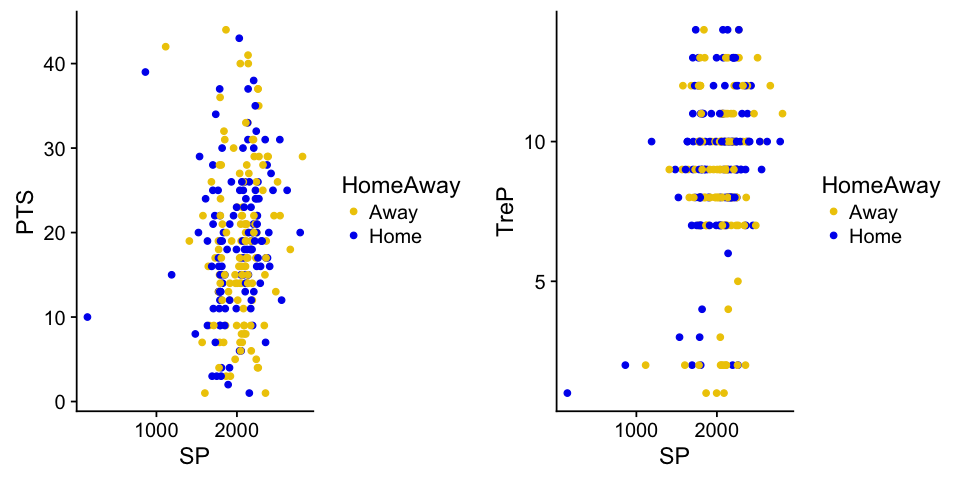

In [77]:
library(cowplot)
options(repr.plot.width=8, repr.plot.height=4)
plot.pts <- ggplot(df, aes(x=SP,y=PTS))+ geom_point(aes(colour=HomeAway)) + scale_color_manual(values=c('gold2','blue2')) 
plot.trep <- ggplot(df, aes(x=SP,y=TreP))+ geom_point(aes(colour=HomeAway)) + scale_color_manual(values=c('gold2','blue2 '))
plot_grid(plot.pts, plot.trep)

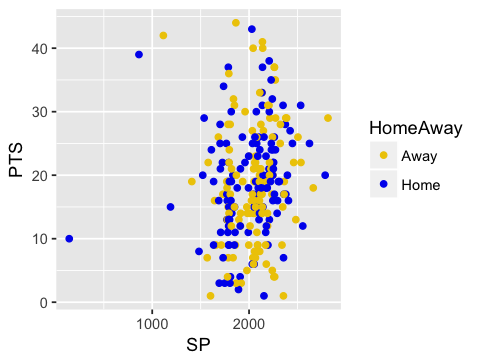

In [75]:
options(repr.plot.width=4, repr.plot.height=3)
plot.pts <- ggplot(df, aes(x=SP,y=PTS))+ geom_point(aes(colour=HomeAway)) + scale_color_manual(values=c('gold2','blue2')) 
plot.pts 

In [32]:
stats = c('FG','FGA','TreP','TrePA','FT','FTA','SP')
#'FGPercent','TrePercent','FTPercent','AST','STL','BLK','ORB','DRB','TRB','TOV','PF','PTS','GmSc','PlusMinus'

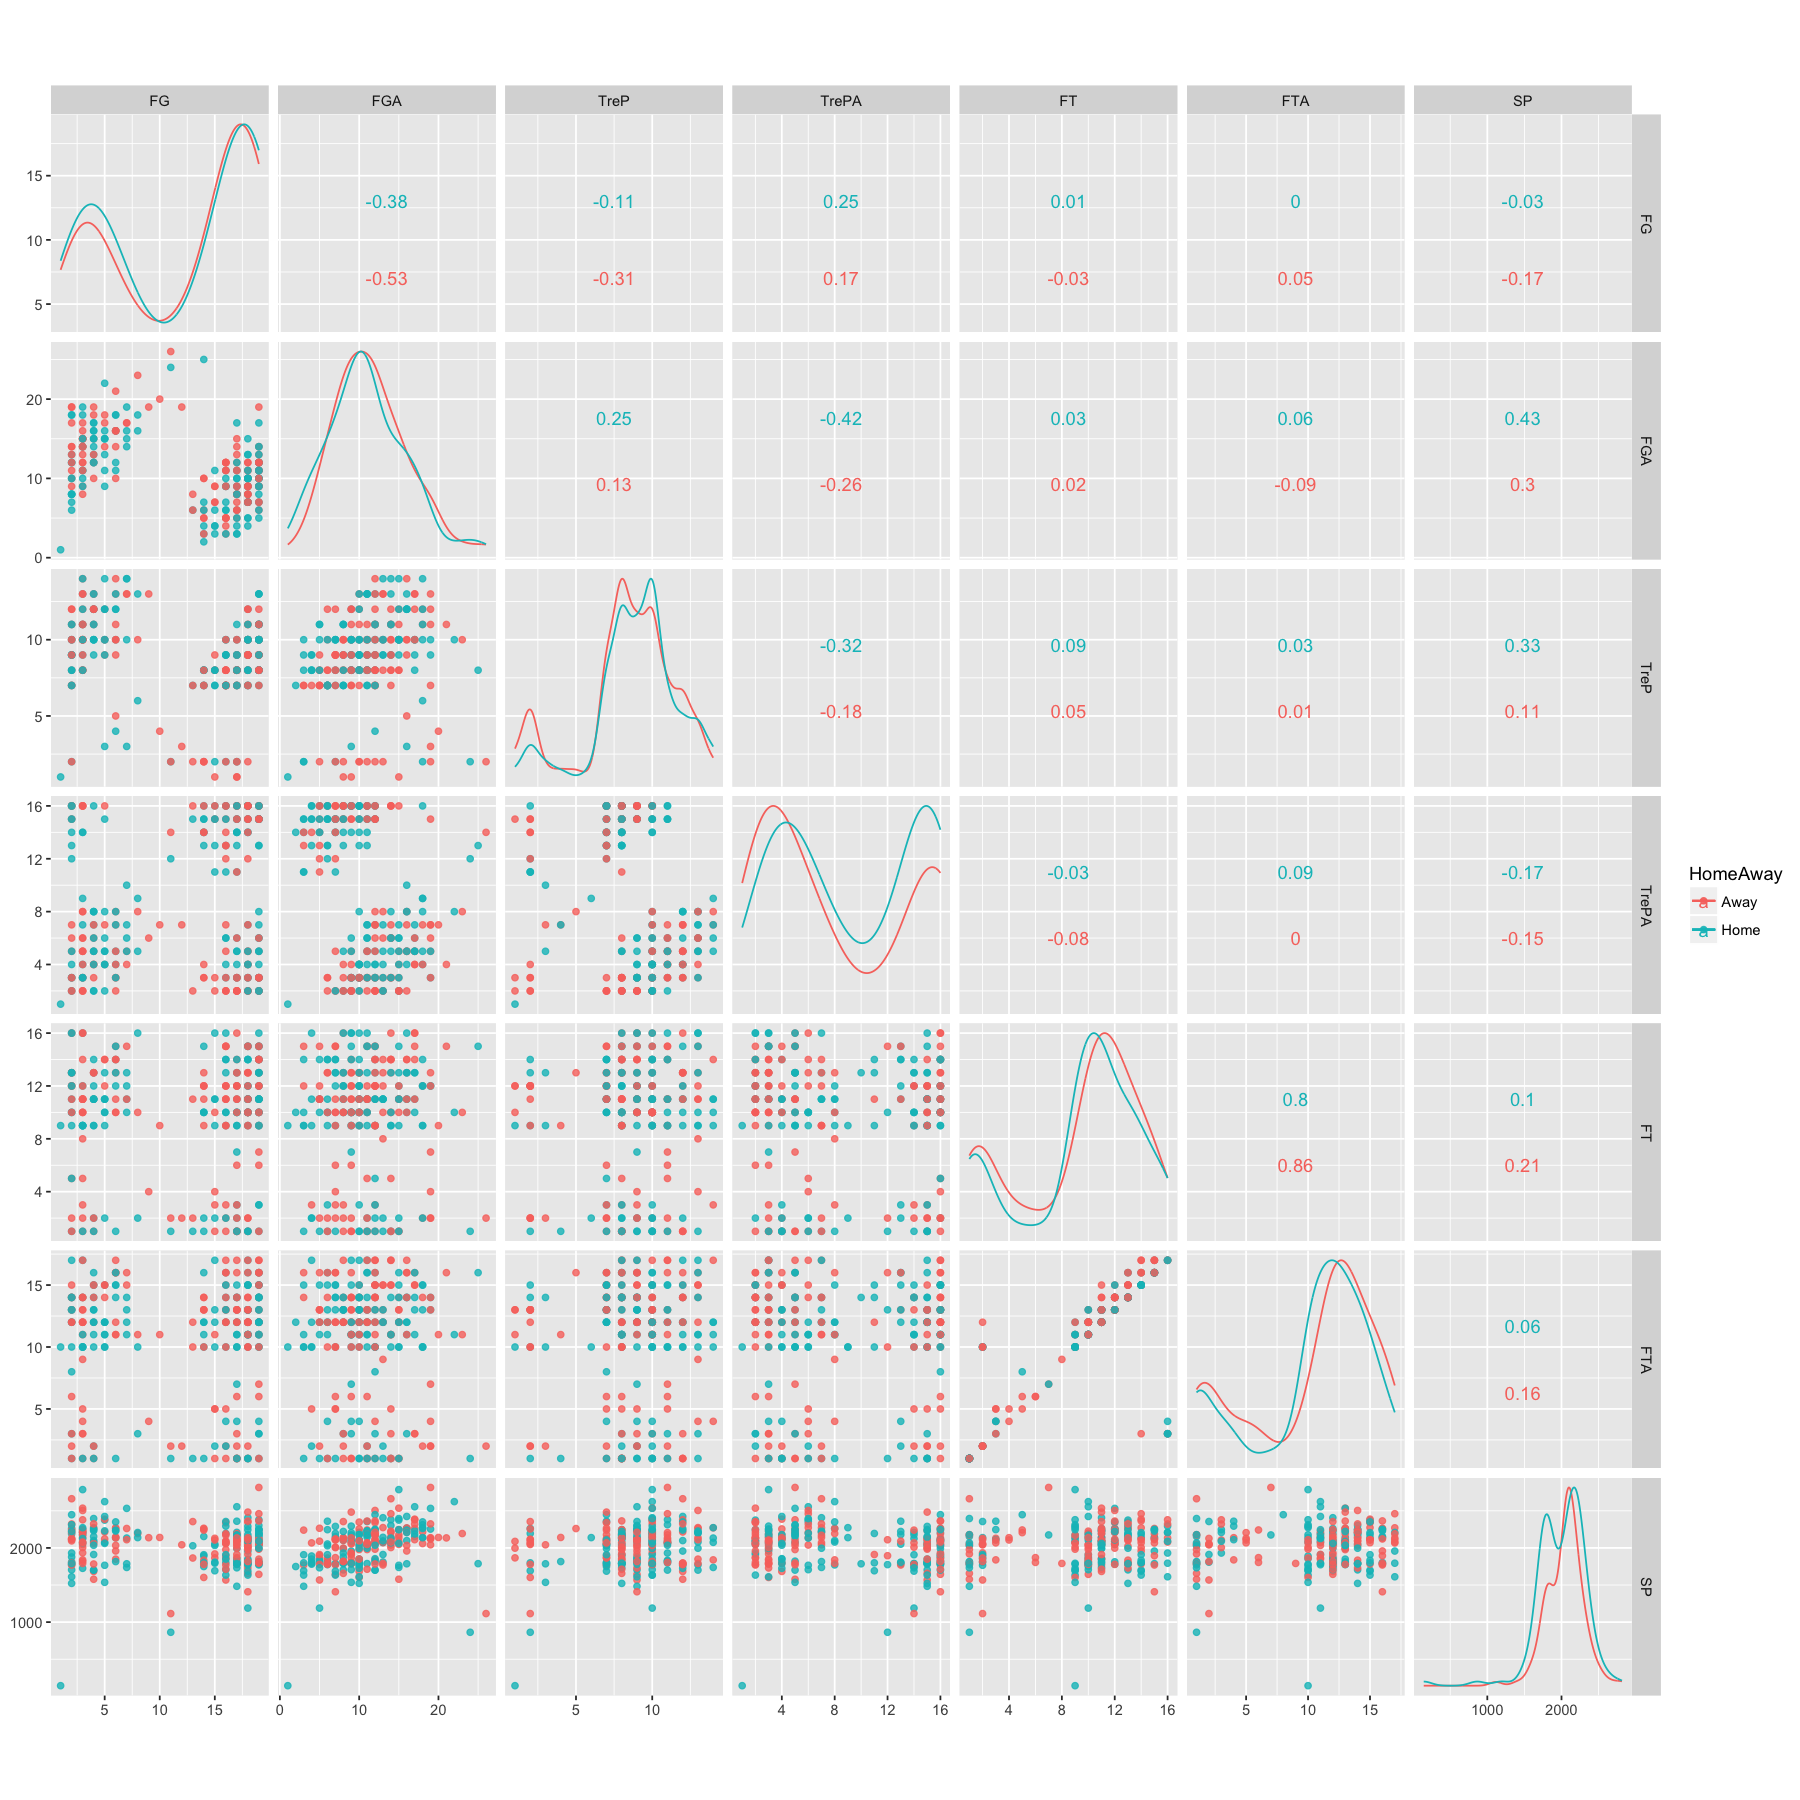

In [40]:
options(repr.plot.width=15, repr.plot.height=15)
ggscatmat(data=df,columns=stats,color='HomeAway',alpha=0.8)

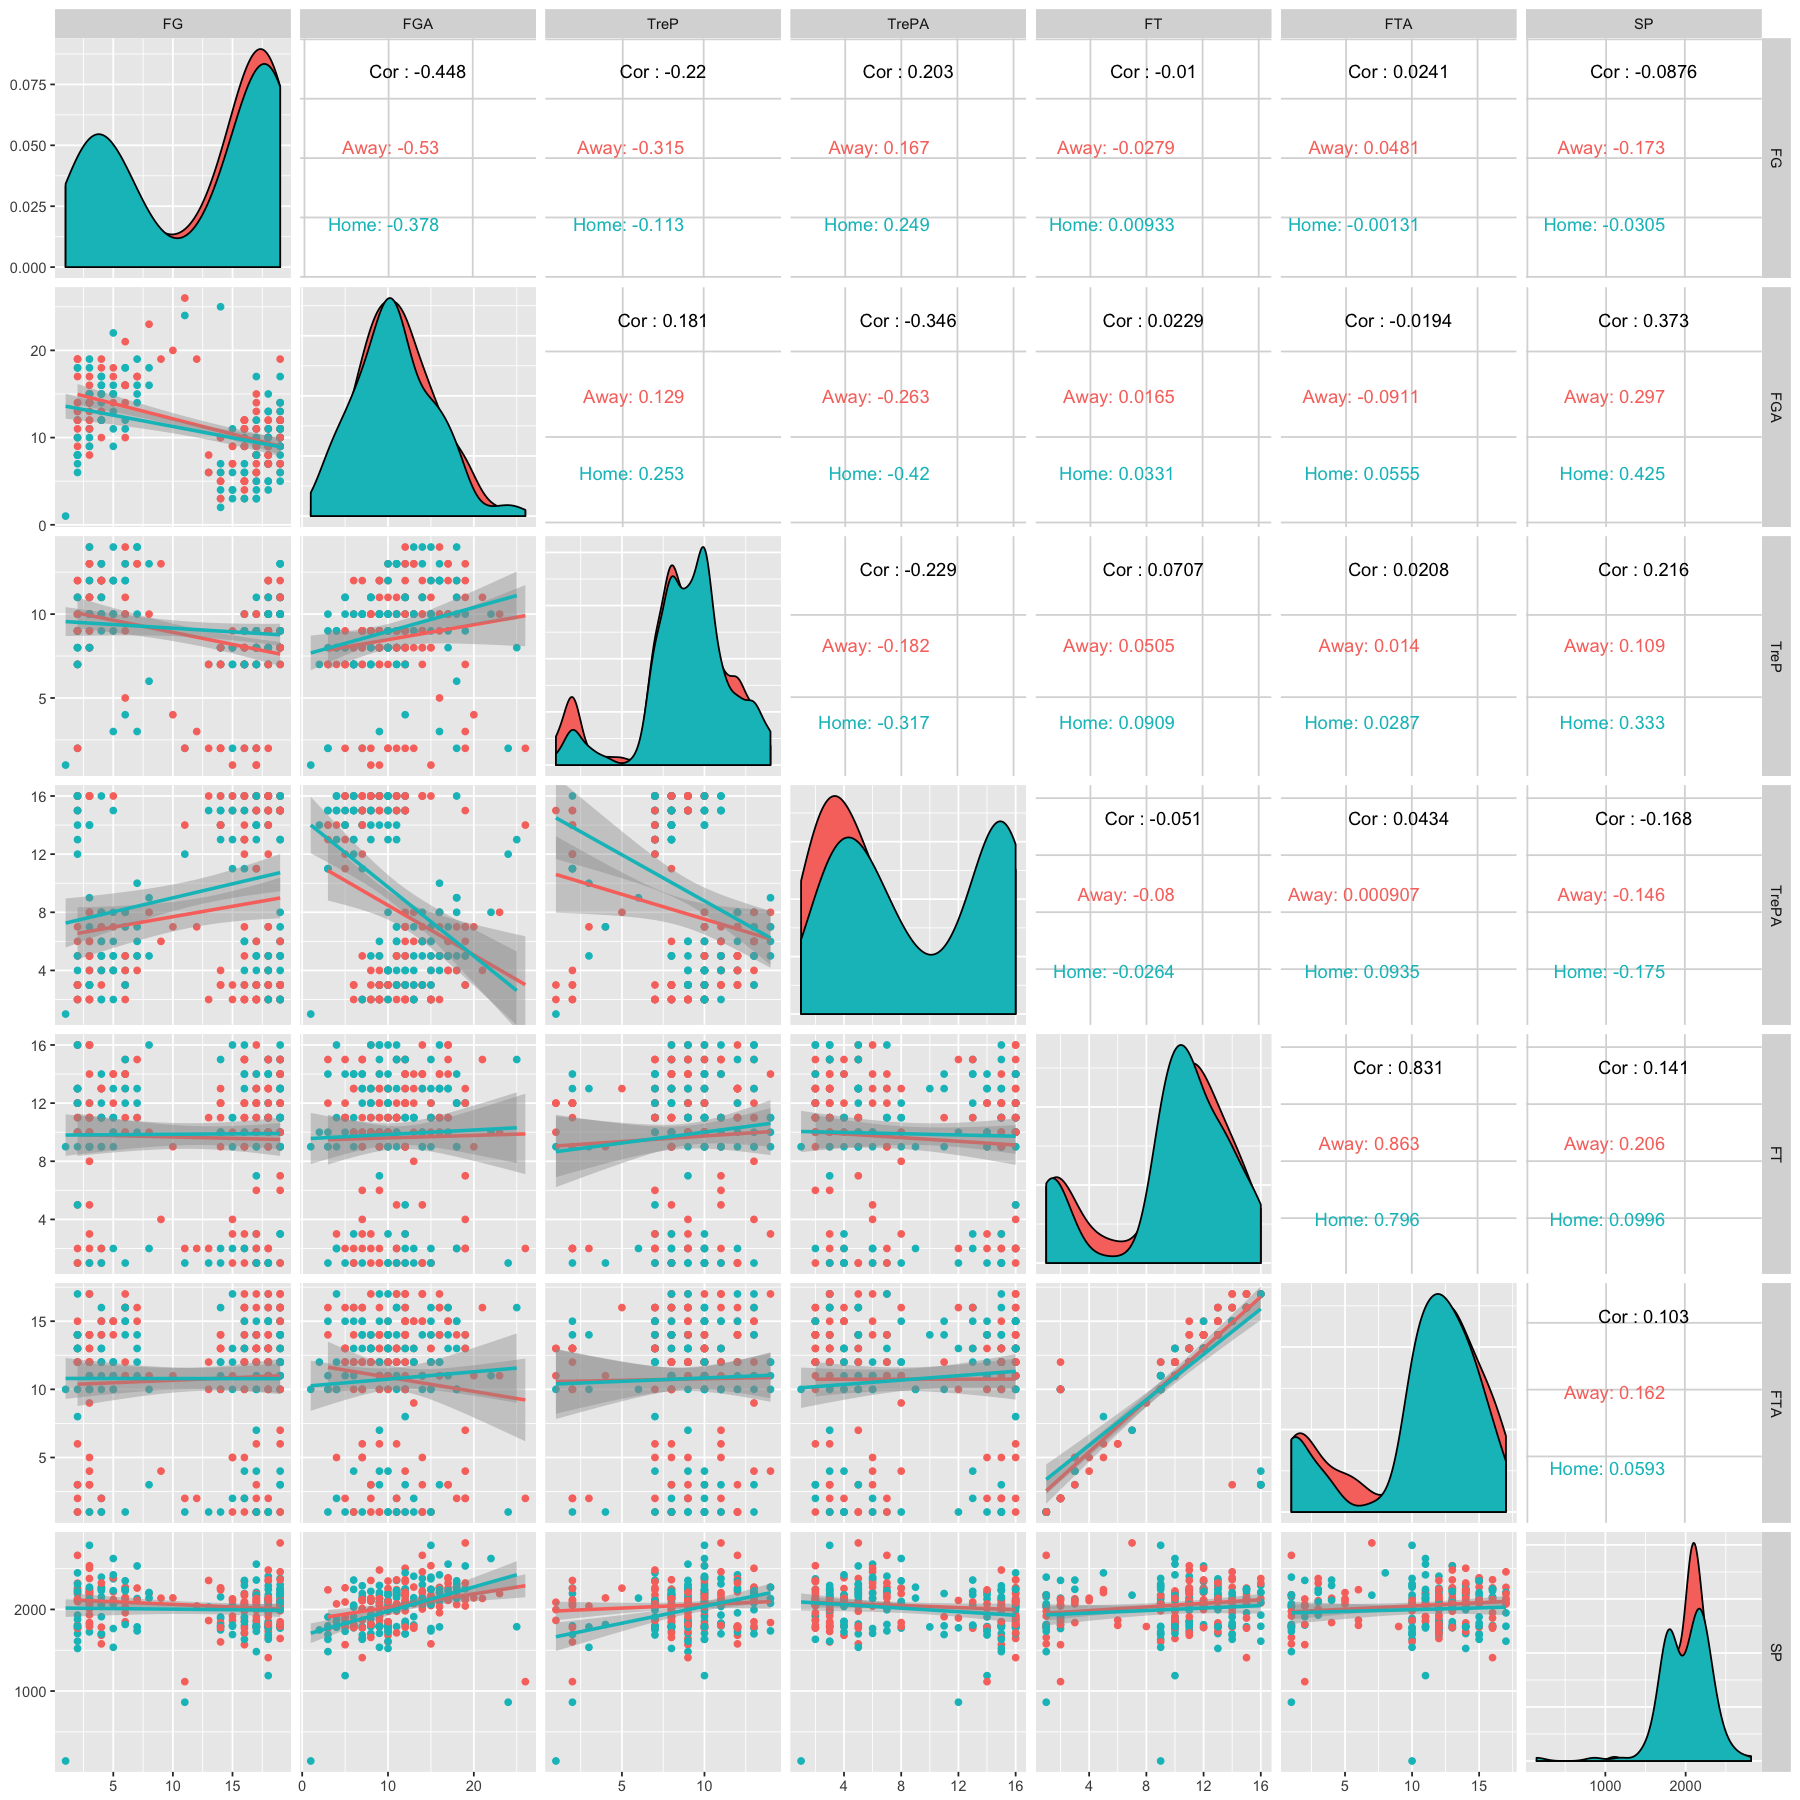

In [66]:
# different pairplot
ggpairs(data=df,columns=stats,mapping=aes(color=HomeAway),lower=list(continuous = "smooth"))

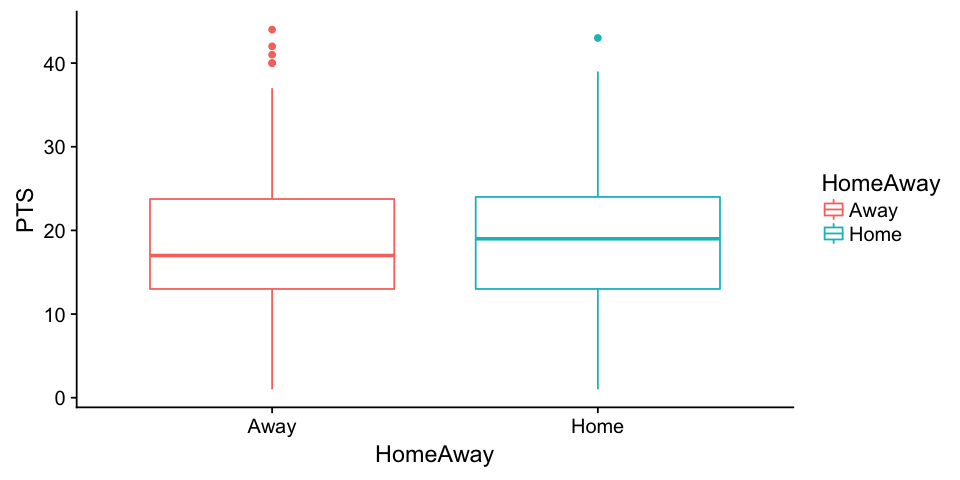

In [100]:
ggplot(data = df, aes(x=HomeAway,y=PTS,color=HomeAway))+ geom_boxplot()